In [20]:
import pandas as pd

data = pd.read_csv("D:/MACHINE LEARNING/CSV DATASET/train.csv")

print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [21]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y', errors='coerce')

In [22]:
if data['Order Date'].isnull().any():
    print("There are missing values in 'Order Date' after conversion:")
    print(data[data['Order Date'].isnull()])

In [23]:
data.dropna(subset=['Order Date'], inplace=True)

In [24]:
monthly_sales = data.resample('M', on='Order Date').sum()

In [25]:
monthly_sales.fillna(0, inplace=True)

In [26]:
print(monthly_sales.head())

            Row ID                                           Order ID  \
Order Date                                                              
2015-01-31  326299  CA-2015-103800CA-2015-112326CA-2015-112326CA-2...   
2015-02-28  272235  CA-2015-140795CA-2015-139857CA-2015-123400CA-2...   
2015-03-31  841782  CA-2015-104269US-2015-143707CA-2015-113880CA-2...   
2015-04-30  641208  US-2015-157021US-2015-157021CA-2015-138359CA-2...   
2015-05-31  601875  CA-2015-115056CA-2015-124618CA-2015-130274CA-2...   

                                                    Ship Date  \
Order Date                                                      
2015-01-31  07/01/201508/01/201508/01/201508/01/201512/01/...   
2015-02-28  03/02/201506/02/201509/02/201509/02/201506/02/...   
2015-03-31  06/03/201505/03/201505/03/201505/03/201505/03/...   
2015-04-30  06/04/201506/04/201506/04/201506/04/201508/04/...   
2015-05-31  02/05/201504/05/201505/05/201510/05/201510/05/...   

                                

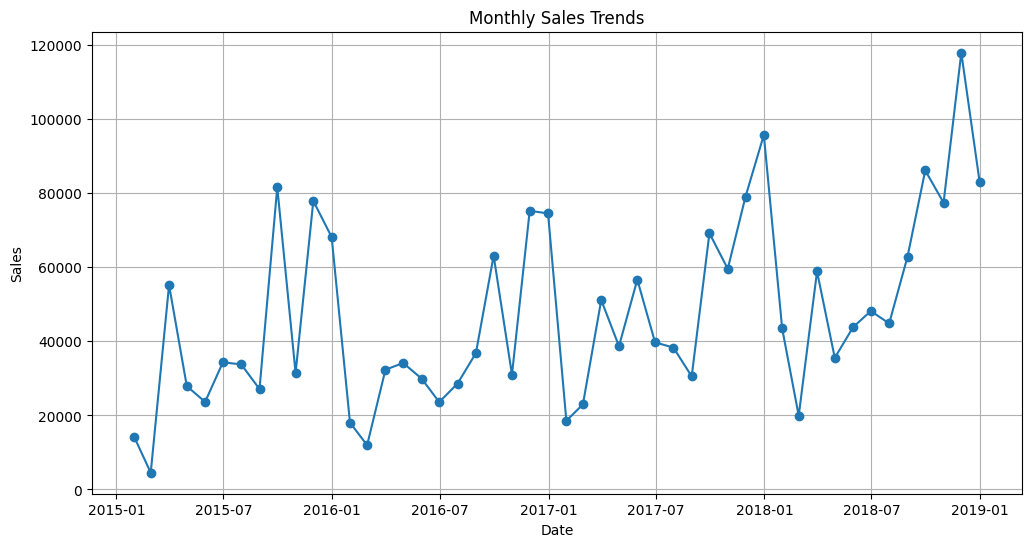

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [28]:
monthly_sales['Month'] = monthly_sales.index.month
monthly_sales['Day_of_Week'] = monthly_sales.index.dayofweek
monthly_sales['Year'] = monthly_sales.index.year
monthly_sales['Quarter'] = monthly_sales.index.quarter

In [29]:
print(monthly_sales.head())

            Row ID                                           Order ID  \
Order Date                                                              
2015-01-31  326299  CA-2015-103800CA-2015-112326CA-2015-112326CA-2...   
2015-02-28  272235  CA-2015-140795CA-2015-139857CA-2015-123400CA-2...   
2015-03-31  841782  CA-2015-104269US-2015-143707CA-2015-113880CA-2...   
2015-04-30  641208  US-2015-157021US-2015-157021CA-2015-138359CA-2...   
2015-05-31  601875  CA-2015-115056CA-2015-124618CA-2015-130274CA-2...   

                                                    Ship Date  \
Order Date                                                      
2015-01-31  07/01/201508/01/201508/01/201508/01/201512/01/...   
2015-02-28  03/02/201506/02/201509/02/201509/02/201506/02/...   
2015-03-31  06/03/201505/03/201505/03/201505/03/201505/03/...   
2015-04-30  06/04/201506/04/201506/04/201506/04/201508/04/...   
2015-05-31  02/05/201504/05/201505/05/201510/05/201510/05/...   

                                

In [30]:
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales.iloc[:train_size], monthly_sales.iloc[train_size:]

In [31]:
print(f'Train Size: {len(train)}, Test Size: {len(test)}')

Train Size: 38, Test Size: 10


In [32]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Sales'], order=(1, 1, 1))
model_fit = model.fit()

In [33]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.929
Date:                Tue, 01 Oct 2024   AIC                            855.857
Time:                        17:20:59   BIC                            860.690
Sample:                    01-31-2015   HQIC                           857.561
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2319      0.316      0.735      0.462      -0.387       0.851
ma.L1         -0.9016      0.149     -6.035      0.000      -1.194      -0.609
sigma2      6.301e+08   8.44e-11   7.47e+18      0.0

In [34]:
predictions = model_fit.forecast(steps=len(test))

In [35]:
predictions_df = pd.DataFrame(predictions, index=test.index, columns=['Predicted Sales'])

In [36]:
print(predictions_df.head())

           Predicted Sales
Order Date                
2018-03-31             NaN
2018-04-30             NaN
2018-05-31             NaN
2018-06-30             NaN
2018-07-31             NaN


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(test['Sales'], predictions, squared=False)
mae = mean_absolute_error(test['Sales'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 30359.900582232036
MAE: 22411.75334598855


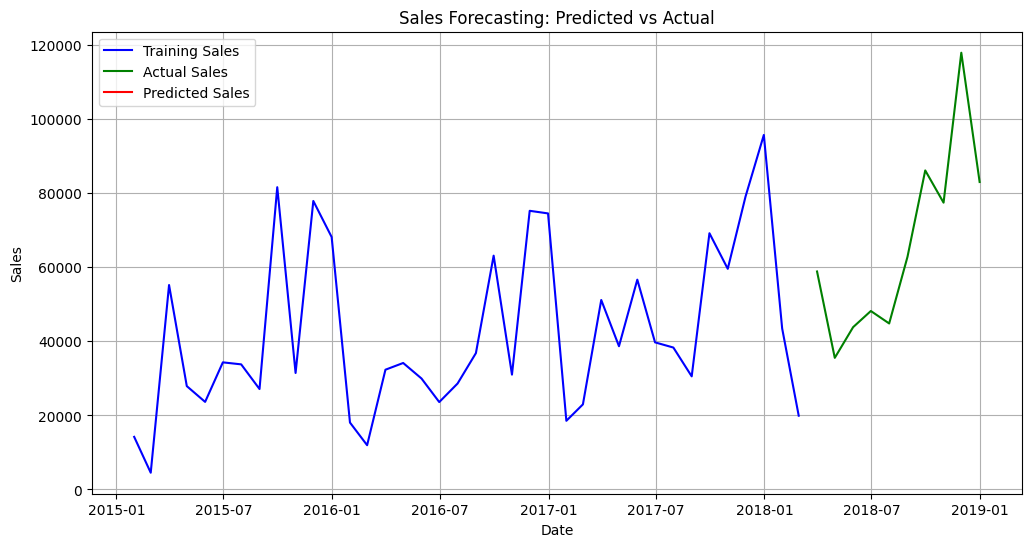

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Training Sales', color='blue')
plt.plot(test.index, test['Sales'], label='Actual Sales', color='green')
plt.plot(predictions_df.index, predictions_df['Predicted Sales'], label='Predicted Sales', color='red')
plt.title('Sales Forecasting: Predicted vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

           Forecasted Sales
2019-01-31              NaN
2019-02-28              NaN
2019-03-31              NaN
2019-04-30              NaN
2019-05-31              NaN
2019-06-30              NaN


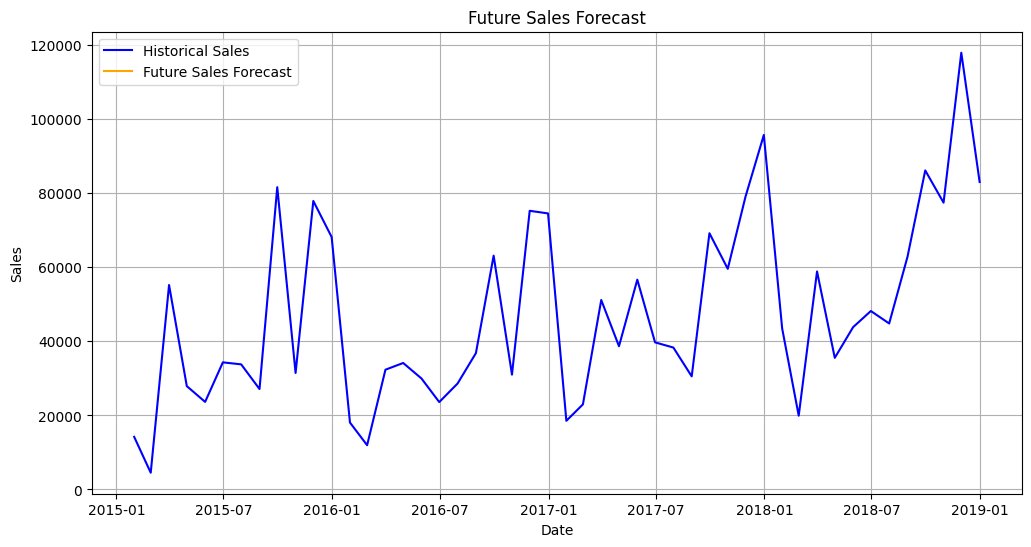

In [40]:
# Forecast future sales for the next 6 months
future_steps = 6
future_forecast = model_fit.forecast(steps=future_steps)

# Create a DataFrame for future forecasts
future_index = pd.date_range(start=monthly_sales.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='M')
future_forecast_df = pd.DataFrame(future_forecast, index=future_index, columns=['Forecasted Sales'])

# Display future forecasts
print(future_forecast_df)

# Plot future sales forecasts
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales', color='blue')
plt.plot(future_forecast_df.index, future_forecast_df['Forecasted Sales'], label='Future Sales Forecast', color='orange')
plt.title('Future Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()